In [20]:
import sys
sys.path.append('..')

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

from config.project_config import get_data_path

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df


# Plots
from src.analyses.fig_experiment import make_combined_figure_startdeviation_tardiness_earliness

In [22]:
# sub_directory = "2025_09_01"
sub_directory = None  # Use root data directory
max_utilization  = 0.75

experiments_file_path = get_data_path(
    sub_directory,
    f"experiments_{max_utilization:.2f}".replace(".", "_")
)

schedules_file_path = get_data_path(
        sub_directory,
        f"schedules_{max_utilization:.2f}".replace(".", "_")
)

In [23]:
df_experiments = pd.read_csv(f"{experiments_file_path}.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type
0,1,0.00,0.0,0.75,0.1,1440,0,0,1,GT_SLACK
1,2,0.00,0.0,0.75,0.1,1440,0,0,1,BnB
2,3,0.00,0.0,0.75,0.1,1440,0,0,1,BnB
3,4,0.00,0.0,0.75,0.1,1440,0,0,1,BnB
4,5,0.00,0.0,0.75,0.1,1440,0,0,1,BnB
5,6,0.00,0.0,0.75,0.1,1440,0,0,1,BnB
6,7,0.00,0.0,0.75,0.1,1440,0,0,1,BnB
7,8,0.00,0.0,0.75,0.1,1440,0,0,1,BnB
8,9,0.00,0.0,0.75,0.1,1440,0,0,1,BnB
9,10,0.00,0.0,0.75,0.1,1440,0,0,1,BnB


In [24]:
df_schedules = pd.read_csv(f"{schedules_file_path}.csv")
df_schedules

,Job,Routing_ID,Experiment_ID,Arrival,Ready Time,Due Date,Shift,Operation,Machine,Original Duration,Start,End
0,01-07500-0000,01-07,1,0,1440,3405,1,0,M02,31,1524,1555
1,01-07500-0000,01-07,5,0,1440,3405,1,0,M02,31,4035,4116
2,01-07500-0000,01-07,6,0,1440,3405,1,0,M02,31,4004,4035
3,01-07500-0000,01-07,7,0,1440,3405,1,0,M02,31,3917,3948
4,01-07500-0000,01-07,11,0,1440,3405,1,0,M02,31,3917,3948
...,...,...,...,...,...,...,...,...,...,...,...,...
49675,01-07500-0365,01-04,1,31643,31680,34575,22,9,M06,53,33751,33804
49676,01-07500-0365,01-04,12,31643,31680,34575,22,9,M06,53,33751,33804
49677,01-07500-0365,01-04,26,31643,31680,34575,22,9,M06,53,32046,32099
49678,01-07500-0365,01-04,29,31643,31680,34575,22,9,M06,53,32046,32099


## Evaluation Dataframes

### Tardiness/Earliness (Metrics)

In [25]:
df_metrics = jobs_metrics_from_operations_df(df_schedules)
df_metrics

,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness
0,01-07500-0000,01-07,1,1,0,3405,3038,0,367,-367
1,01-07500-0001,01-06,1,1,60,2433,2298,0,135,-135
2,01-07500-0002,01-01,1,1,142,2766,2429,0,337,-337
3,01-07500-0003,01-05,1,1,197,2640,2713,73,0,73
4,01-07500-0004,01-04,1,1,249,3581,3205,0,376,-376
...,...,...,...,...,...,...,...,...,...,...
3277,01-07500-0329,01-01,38,20,28630,29779,31327,1548,0,1548
3278,01-07500-0330,01-00,38,20,28684,30067,31077,1010,0,1010
3279,01-07500-0331,01-07,38,20,28684,30515,30882,367,0,367
3280,01-07500-0332,01-02,38,20,28720,30682,31414,732,0,732


### Start Deviation

In [26]:
df_dev = mean_start_deviation_per_shift_df(df_schedules)
df_dev.head(12)

,Experiment_ID,Shift,Deviation,Pairs
0,1,2,32.210526,19
1,1,3,112.666667,24
2,1,4,115.488095,84
3,1,5,51.592308,130
4,1,6,39.144737,76
5,1,7,51.000000,22
6,1,8,128.870370,54
7,1,9,71.298969,97
8,1,10,23.000000,39
9,1,11,52.289474,38


## Examples

In [27]:
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"] == 0.5) &
    (df_experiments["Inner Tardiness Ratio"] == 0.5)
]

df_experiments_filtered

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type


In [44]:
experiment_id  = 37

### Tardiness/Earliness (Metrics)

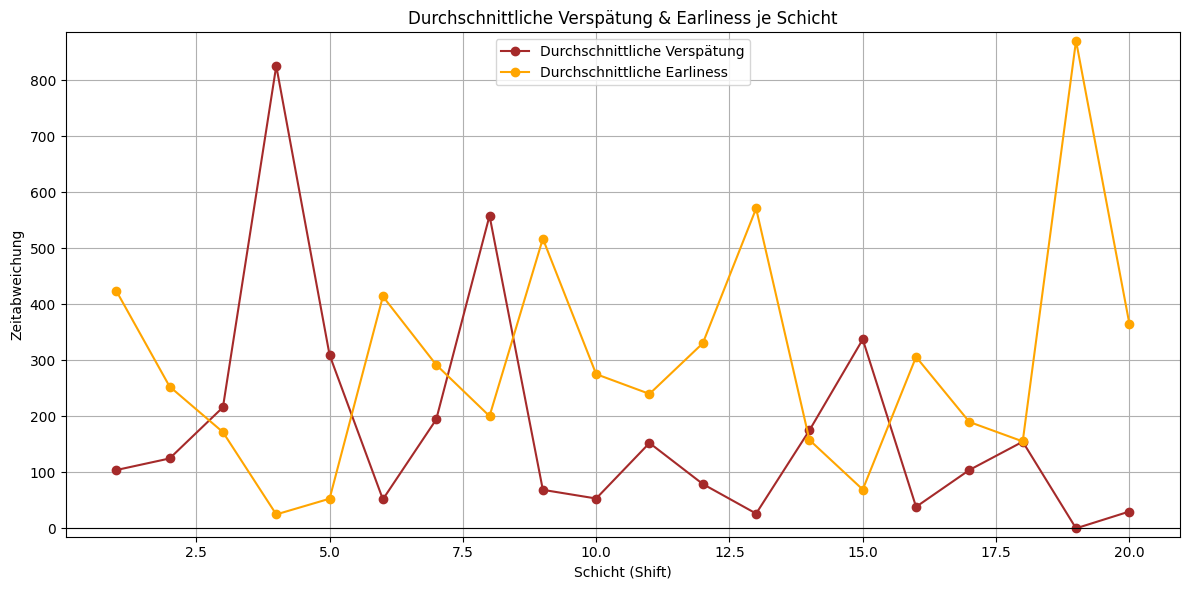

In [45]:
    from src.analyses.fig_tardiness_earliness import make_fig_tardiness_earliness_only

    fig = make_fig_tardiness_earliness_only(df_metrics, experiment_id=experiment_id, y_step=100, show_earliness=True)
    plt.show()

### Start Deviation

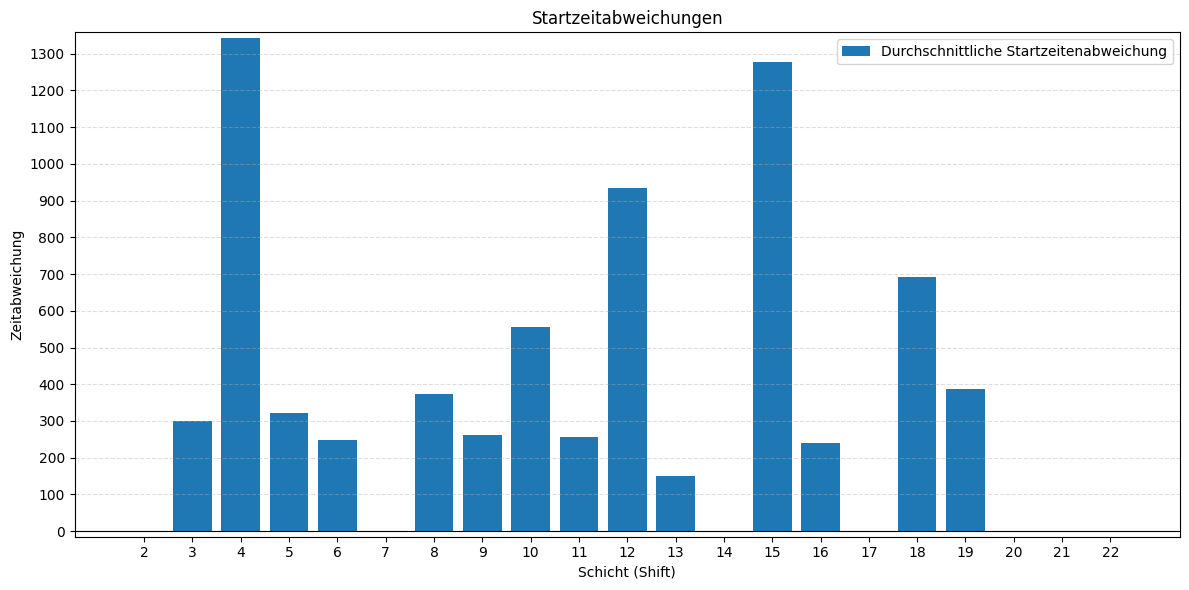

In [46]:
from src.analyses.fig_startdeviation import make_fig_startdeviation_only

fig = make_fig_startdeviation_only(df_dev, experiment_id=experiment_id, y_step=100)
plt.show()

### Vergleich

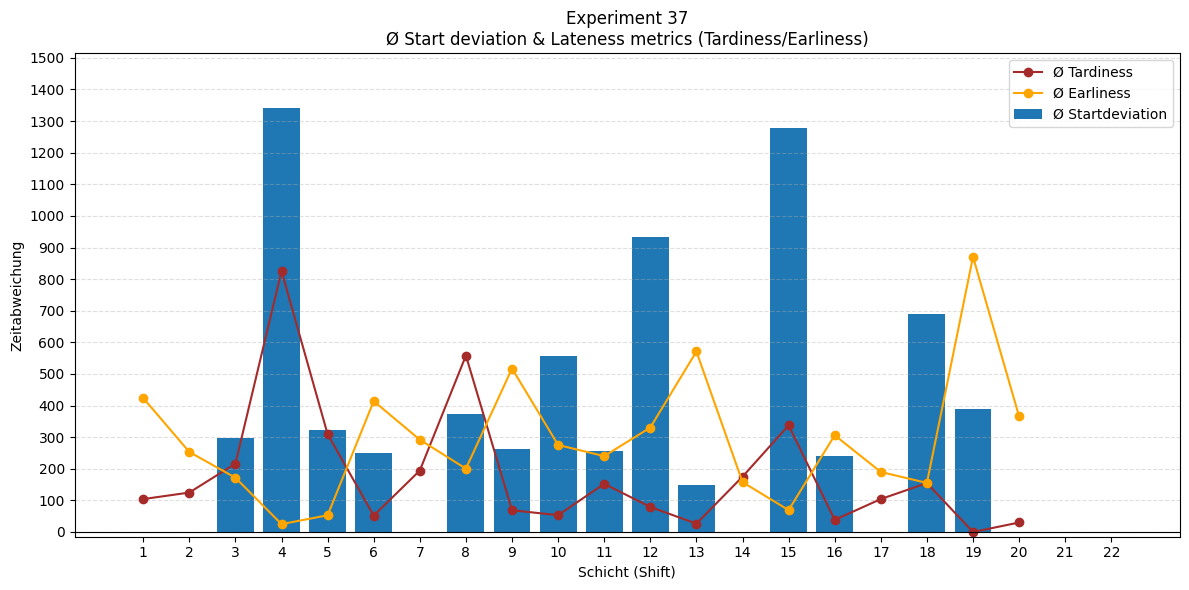

In [48]:
fig = make_combined_figure_startdeviation_tardiness_earliness(
    df_dev=df_dev,
    df_metrics=df_metrics,
    experiment_id=experiment_id,
    y_step=100,
    y_max = 1500,
    title=f"Experiment {experiment_id}"
          + f"\nØ Start deviation & Lateness metrics (Tardiness/Earliness)"
)
plt.show()

In [42]:
def get_experiment_string(df, experiment_id):
    row = df[df["Experiment_ID"] == experiment_id].iloc[0]
    return (
        f"Experiment {experiment_id}\n"
        f"lateness/deviation = {row['Abs Lateness Ratio']:.2f}, "
        f"tardiness/earliness = {row['Inner Tardiness Ratio']:.2f}, "
        f"bottleneck utilization = {row['Max Bottleneck Utilization']:.2f} "
        f"(sigma = {row['Sim Sigma']:.2f})"
    )

# Beispiel
print(get_experiment_string(df_experiments, 38))


Experiment 38
lateness/deviation = 0.00, tardiness/earliness = 0.00, bottleneck utilization = 0.75 (sigma = 0.10)


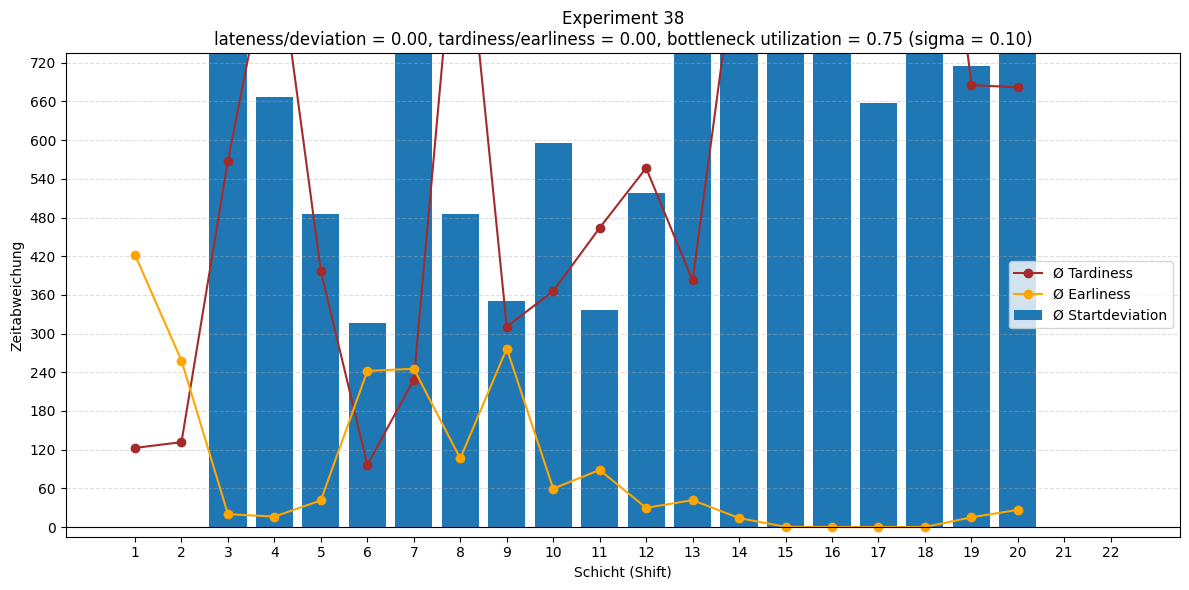

In [43]:
# experiment_id  = 22
fig = make_combined_figure_startdeviation_tardiness_earliness(
    df_dev=df_dev,
    df_metrics=df_metrics,
    experiment_id=experiment_id,
    y_step=60,
    y_max = 720,
    title=f"{get_experiment_string(df_experiments, experiment_id)}"
)
plt.show()

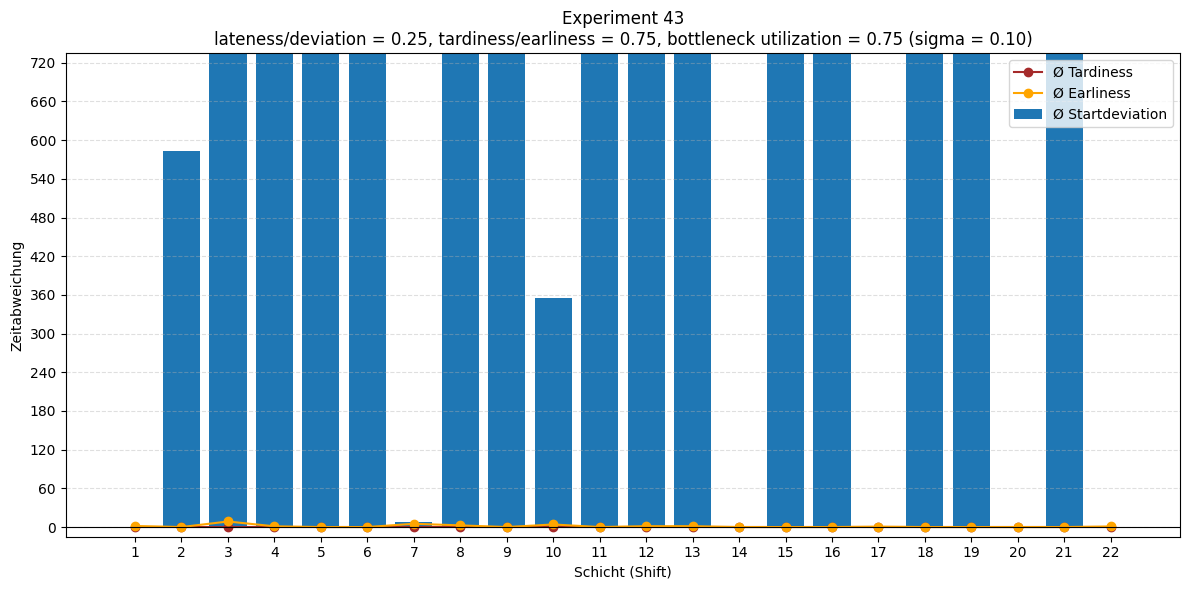

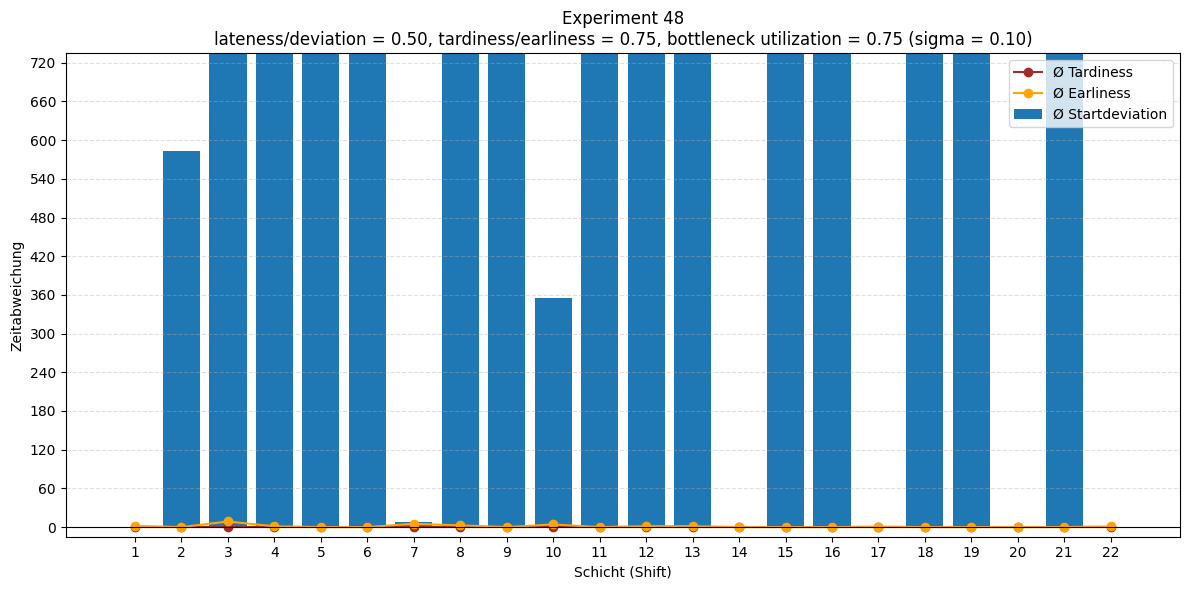

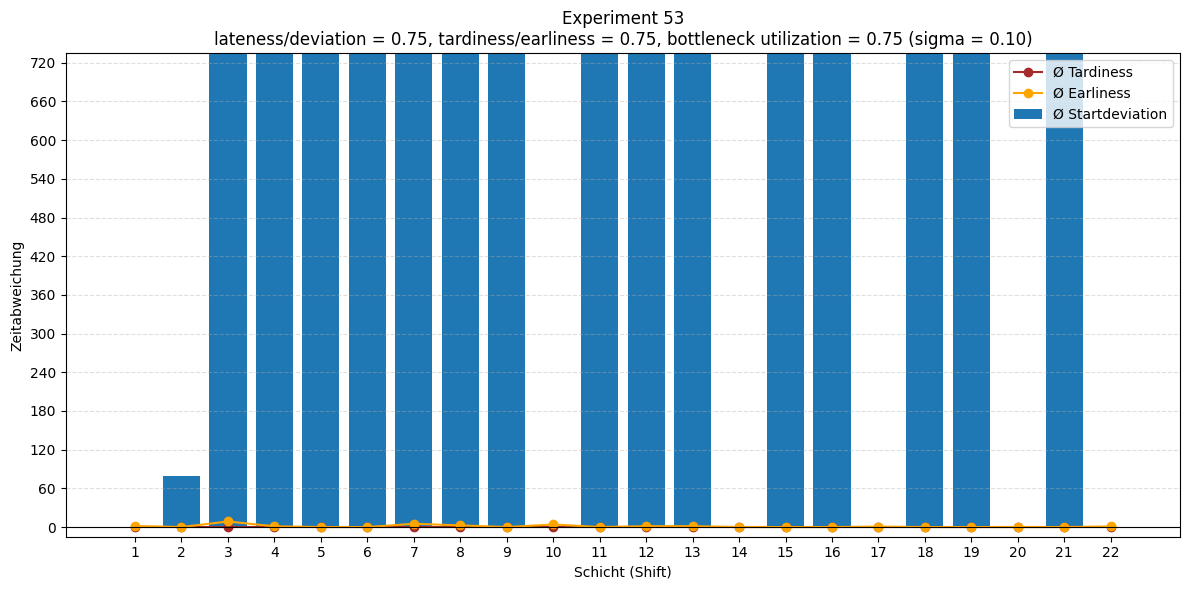

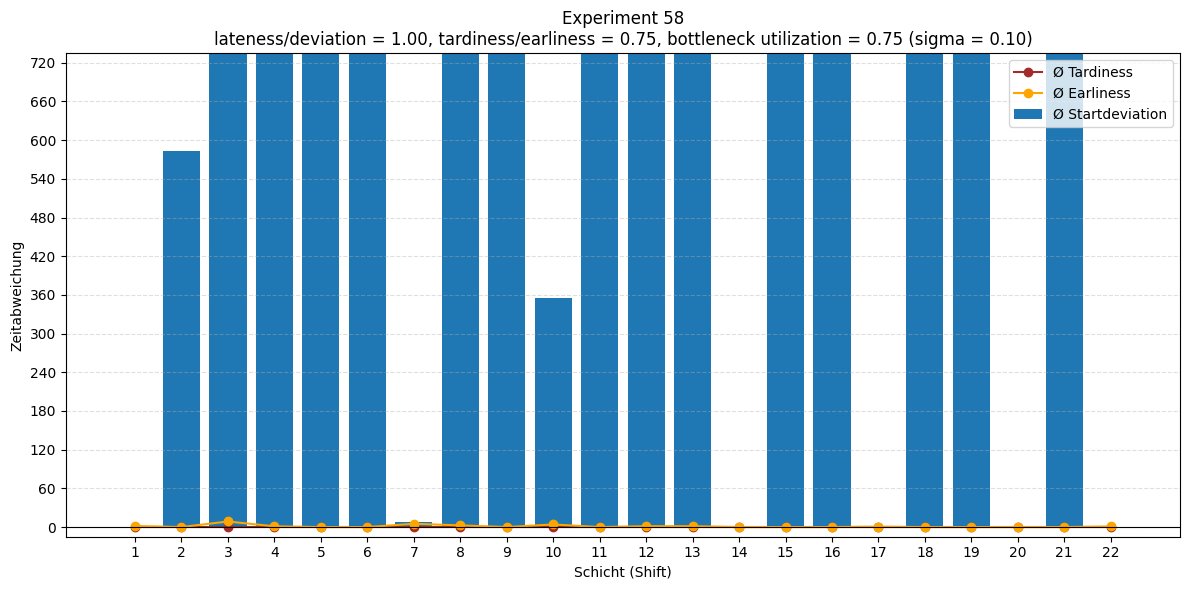

In [37]:
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"].isin([0.25, 0.5, 0.75, 1])) &
    (df_experiments["Inner Tardiness Ratio"] == 0.75) &
    (df_experiments["Sim Sigma"] == 0.1)
]

experiment_ids = df_experiments_filtered["Experiment_ID"].tolist()


for experiment_id in experiment_ids:
    make_combined_figure_startdeviation_tardiness_earliness(
        df_dev=df_dev,
        df_metrics=df_metrics,
        experiment_id=experiment_id,
        y_step=60,
        y_max = 720,
        title=f"{get_experiment_string(df_experiments, experiment_id)}"
    )
    plt.show()
